In [67]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.animation as animation
%matplotlib inline
from IPython.display import HTML

In [68]:
df = pd.read_csv('../data/ctraj_interp.txt',index_col=False)
df = df.apply(pd.to_numeric)
print(df.head())

   333  269  335  315  351  321  Unnamed: 6
0  331  273  317  327  331  313         NaN
1  333  271  377  327  337  307         NaN
2  327  273  319  327  335  315         NaN
3  355  307  305  275  341  317         NaN
4  357  304  333  343  342  312         NaN


In [69]:
VIDEO_DATA = True # set if imported data is raw weaselball trajectories

if VIDEO_DATA:
    df.drop(df.columns[6],axis=1, inplace=True)

df.columns = ['X1','Y1','X2','Y2','X3','Y3']
    
print(df.head())

    X1   Y1   X2   Y2   X3   Y3
0  331  273  317  327  331  313
1  333  271  377  327  337  307
2  327  273  319  327  335  315
3  355  307  305  275  341  317
4  357  304  333  343  342  312


In [72]:
n_agents = int(len(df.columns)/2)
xcols = [df.columns[i*2] for i in range(n_agents)]
ycols = [df.columns[i*2+1] for i in range(n_agents)]

agents = [[] for i in range(n_agents)]

for i in range(n_agents):
    agents[i] = zip(df[xcols[i]], df[ycols[i]])
    

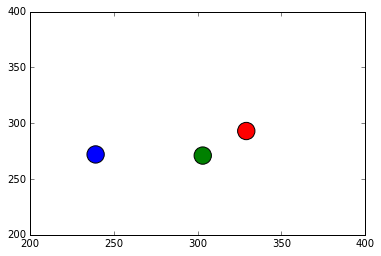

In [83]:
# https://stackoverflow.com/questions/9401658/how-to-animate-a-scatter-plot

class AnimatedScatter(object):
    """An animated scatter plot using matplotlib.animations.FuncAnimation."""
    def __init__(self, data):
        self.n = len(data)
        self.data = data
        self.stream = self.data_stream()

        # Setup the figure and axes...
        self.fig, self.ax = plt.subplots()
        # Then setup FuncAnimation.
        self.ani = animation.FuncAnimation(self.fig, self.update, interval=250, 
                                           init_func=self.setup_plot, blit=True)

    def setup_plot(self):
        """Initial drawing of the scatter plot."""
        x, y = next(self.stream)
        x, y = [],[]
        #print(x)
        #print(y)
        self.scat = self.ax.scatter(x, y, c=['r','g','b'], s=300, animated=True)
        self.ax.axis([200, 400, 200, 400])

        # For FuncAnimation's sake, we need to return the artist we'll be using
        # Note that it expects a sequence of artists, thus the trailing comma.
        return self.scat,

    def data_stream(self):
        j = 0
        while j < 1700:
            xy = [[],[]]
            for i in range(self.n):
                (x,y) = next(self.data[i])
                xy[0].append(x)
                xy[1].append(y)
            yield xy
            j += 1

    def update(self, i):
        """Update the scatter plot."""
        data = next(self.stream)

        # Set x and y data...
        self.scat.set_offsets(data)

        # We need to return the updated artist for FuncAnimation to draw..
        # Note that it expects a sequence of artists, thus the trailing comma.
        return self.scat,

    #def show(self):
    #    plt.show()
        
a = AnimatedScatter(agents)
HTML(a.ani.to_html5_video())
